In [1]:
import os
import json
import pandas as pd

In [2]:
gr = pd.read_csv(os.path.join("data","goodreads-hodnoceni.csv"))

In [3]:
gr['GR_date'].max()

'2024-04-19 23:44:13'

In [4]:
gr[gr['GR_ratings_count'] >= 50].groupby('GR_title')['GR_rating'].last().nlargest(30)

GR_title
U severní zdi by Petra Klabouchová                                                          4.71
Budoucnost nepráce by Filip Dřímalka                                                        4.67
V pasti pohlaví by Silvie Lauder                                                            4.57
Severka by Nina Špitálníková                                                                4.51
Rozložíš paměť by Marek Torčík                                                              4.43
Zvonkohra by Eliška Václavíková                                                             4.40
Hrdinové kapitalistické práce v Evropě by Saša Uhlová                                       4.33
Srpny by Jakub Stanjura                                                                     4.33
Feministkou snadno a rychle by Lucie Jarkovská                                              4.30
Nebuď p*ča aneb jak (ne)pracovat s dětmi by Tomáš Morávek                                   4.27
Vraní oko by Michaela

In [5]:
gr.groupby("GR_title")['GR_ratings_count'].max().nlargest(30)

GR_title
Srpny by Jakub Stanjura                                                                     977.0
Těla by Klára Vlasáková                                                                     749.0
Severka by Nina Špitálníková                                                                649.0
Kde jsi, když nejsi by Radka Třeštíková                                                     548.0
Jsme nevyhnutelní (Navždycky #4) by Nofreeusernames                                         514.0
Gazely by Patrik Hartl                                                                      353.0
Rozložíš paměť by Marek Torčík                                                              344.0
Fosilie by Michal Kašpárek                                                                  339.0
U severní zdi by Petra Klabouchová                                                          327.0
Sudetenland by Leoš Kyša                                                                    271.0
Zvonkohra b

In [6]:
pd.Series(gr.groupby("GR_title")['GR_ratings_count'].max() - gr.groupby("GR_title")['GR_ratings_count'].min()).nlargest(25)

GR_title
Rozložíš paměť by Marek Torčík                               43.0
Srpny by Jakub Stanjura                                      41.0
Severka by Nina Špitálníková                                 34.0
V pasti pohlaví by Silvie Lauder                             31.0
Feministkou snadno a rychle by Lucie Jarkovská               30.0
Těla by Klára Vlasáková                                      25.0
Fosilie by Michal Kašpárek                                   21.0
Sudetenland by Leoš Kyša                                     20.0
Někdo z nás by Kristýna Trpková                              17.0
Kde jsi, když nejsi by Radka Třeštíková                      16.0
Černobyl: Pád Atomgradu by Matyáš Namai                      16.0
Gazely by Patrik Hartl                                       15.0
U severní zdi by Petra Klabouchová                           15.0
Vyhoření by Petr Šesták                                      14.0
Neodpovídej... by Lucie Bechynková                           10.0
P

In [7]:
dk = pd.read_csv(os.path.join("data","databazeknih-hodnoceni.csv"))

In [8]:
dk['DK_date'].max()

'2024-04-19 23:56:30'

In [9]:
dk.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_tags', 'DK_Chci_si_koupit',
       'DK_rating', 'DK_ratings_count', 'DK_Přečtených', 'DK_Chystám_se_číst',
       'DK_Právě_čtených', 'DK_Čtenářské_výzvě', 'DK_Knihotéce',
       'DK_Doporučených', 'DK_dalších_seznamech'],
      dtype='object')

In [10]:
pd.Series(dk.groupby("DK_titul")['DK_ratings_count'].max() - dk.groupby("DK_titul")['DK_ratings_count'].min()).nlargest(40)

DK_titul
Chalupa                                                                           92.0
Někdo z nás                                                                       87.0
Gazely                                                                            75.0
Pláňata                                                                           43.0
U severní zdi                                                                     42.0
Sudetský dům II: Podzim 1947                                                      35.0
Sudetenland                                                                       30.0
Severka                                                                           29.0
Vraní oko                                                                         28.0
Srpny                                                                             27.0
Kde jsi, když nejsi                                                               25.0
Balada pro Emily                  

In [11]:
dk[dk['DK_ratings_count'] > 200].groupby("DK_titul")['DK_rating'].max().nlargest(20)

DK_titul
U severní zdi                       95.0
Markovič: Lovec přízraků            93.0
Heřmánkové údolí                    92.0
Jednooký král Václav I.             92.0
Blues: Blues pro bláznivou holku    91.0
Na králův příkaz                    91.0
Návrat nežádoucí                    91.0
Ženy na pranýři                     91.0
Cejch                               90.0
Pán hor II                          90.0
Sudetský dům II: Podzim 1947        90.0
Vraní oko                           90.0
Husitská epopej. V, 1450            89.0
Platnéř                             89.0
Oprátka za osm mrtvých              88.0
Severka                             88.0
Brněnské nevěstky                   87.0
Prodavači ostatků                   87.0
Lucas                               86.0
Osudy dobrého vojáka Švejka         86.0
Name: DK_rating, dtype: float64

In [12]:
dk[dk['DK_ratings_count'] > 50].groupby("DK_titul")['DK_rating'].max().nsmallest(50)

DK_titul
Neodpovídej                                   63.0
Smrková Tišina                                63.0
Město v mlze                                  66.0
Nejvyšší karta                                66.0
Povídky o lásce                               67.0
Pražačka na vsi                               68.0
Ženy zločinu                                  68.0
Spoutej mě                                    69.0
Transfer                                      69.0
Němé duše                                     70.0
Teorie býka                                   70.0
Zapisovatelé otcovský lásky                   70.0
Zlatokopka                                    70.0
Co tě nezabije                                71.0
Jiné místo                                    71.0
Těla                                          71.0
Zítřek ti nikdo neslíbil                      71.0
Kde jsi, když nejsi                           72.0
Krvavé léto                                   72.0
Veselé Vánoce, Terezko

In [13]:
import numpy as np

In [14]:
df = pd.read_csv(os.path.join("data","martinus_vyslo.csv"))

In [15]:
df

,M_titul,M_autorstvo,M_anotace,M_počet_stran,M_vazba,M_rozměr,M_hmotnost,M_isbn,M_rok_vydání,M_styl,...,M_překlad,M_vydání,M_originální_název,M_účel_knihy,M_ostatní,M_filmové_zpracování,M_příloha,M_jazyková_úroveň,M_předběžné_datum_vydání,M_knižní_předloha
0,Rozhovory s osobnostmi doby covidové,Mikšová,Příchod epidemie SARS-CoV-2 v roce 2020 nikdo ...,224.0,pevná vazba,148×198 mm,254 g,9788090810112,2021.0,psychologický,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101 minut,Štěpán Kopřiva,"Co se stane, když během výpadku proudu uvíznet...",216.0,pevná vazba,146×206 mm,334 g,9788076791206,2022.0,napínavý,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kořeny,Václav Franc,Kniha Kořeny plus třicet povídek představuje č...,208.0,pevná vazba,NaN,NaN,9788088391043,2022.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Moje nervy,Vítězslava Jabůrková,"Autobiografický příběh o ženě, jejíž život je ...",272.0,brožovaná vazba,130×200 mm,310 g,9788027097586,2021.0,životopisný,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Noc s Holanem,Michael Třeštík,Noc s Holanem je vzrušující noční rozhovor živ...,128.0,pevná vazba,135×185 mm,300 g,9788087545881,2022.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11570,Gregor Johann Mendel a strastiplný příběh genů,Lucie Seifertová,Kniha vypráví příběh geniálního zakladatele ge...,68.0,pevná vazba,217×308 mm,562 g,9788075097972,2021.0,životopisný,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11571,Josefína na zeleném ostrově,Anna Sobotková,Volné pokračování knihy Odvážná holka o školač...,200.0,pevná vazba,145×205 mm,372 g,9788076508378,2022.0,dobrodružný,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11572,Třeťák,Ella Fever,"Jaké to je, narodit se do klučičího těla, i kd...",216.0,brožovaná vazba,130×200 mm,251 g,9788076508484,2022.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11573,Huggigovo proroctví: Poslední slza,Jan Chmelář,"Fantasy román z jiného světa, do něhož se podi...",184.0,brožovaná vazba,140×200 mm,222 g,9788076507210,2022.0,dobrodružný,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df['isbn'] = df['M_isbn'].astype(str)

In [17]:
dk['isbn'] = dk['DK_isbn'].astype(str)

In [18]:
gr['isbn'] = gr['GR_isbn'].apply(lambda x: int(x)).astype(str)

In [19]:
dkm = dk.merge(df, on="isbn", how="inner")

In [20]:
dkm = dkm.merge(gr, on="isbn", how="inner")

In [21]:
dkm.columns

Index(['DK_isbn', 'DK_date', 'DK_titul', 'DK_tags', 'DK_Chci_si_koupit',
       'DK_rating', 'DK_ratings_count', 'DK_Přečtených', 'DK_Chystám_se_číst',
       'DK_Právě_čtených', 'DK_Čtenářské_výzvě', 'DK_Knihotéce',
       'DK_Doporučených', 'DK_dalších_seznamech', 'isbn', 'M_titul',
       'M_autorstvo', 'M_anotace', 'M_počet_stran', 'M_vazba', 'M_rozměr',
       'M_hmotnost', 'M_isbn', 'M_rok_vydání', 'M_styl', 'M_jazyk', 'M_původ',
       'M_nakladatel', 'M_kategorizace', 'M_cena', 'M_datum', 'Přečtená',
       'M_pro_koho', 'M_série', 'M_díl', 'E-kniha', 'M_edice', 'Audiokniha',
       'M_věkové_doporučení', 'M_ilustrace', 'M_překlad', 'M_vydání',
       'M_originální_název', 'M_účel_knihy', 'M_ostatní',
       'M_filmové_zpracování', 'M_příloha', 'M_jazyková_úroveň',
       'M_předběžné_datum_vydání', 'M_knižní_předloha', 'GR_isbn', 'GR_date',
       'GR_title', 'GR_rating', 'GR_ratings_count', 'GR_reviews',
       'GR_published'],
      dtype='object')

In [22]:
import seaborn as sns

In [23]:
merged = pd.DataFrame(dkm[(dkm['DK_ratings_count'] > 10) & (dkm['GR_ratings_count'] > 5)].groupby(['isbn','M_počet_stran'])[['DK_Chystám_se_číst','DK_rating','DK_ratings_count','DK_Přečtených','GR_rating','GR_ratings_count']].max()).reset_index()

In [24]:
merged

,isbn,M_počet_stran,DK_Chystám_se_číst,DK_rating,DK_ratings_count,DK_Přečtených,GR_rating,GR_ratings_count
0,9788011033620,352.0,11.0,100.0,12.0,15.0,4.13,8.0
1,9788011034887,400.0,89.0,87.0,152.0,169.0,4.19,76.0
2,9788011035594,248.0,116.0,88.0,81.0,120.0,4.19,144.0
3,9788011037154,240.0,46.0,80.0,12.0,20.0,4.69,58.0
4,9788020034366,192.0,24.0,90.0,14.0,17.0,4.25,14.0
...,...,...,...,...,...,...,...,...
200,9788090828995,240.0,77.0,84.0,124.0,157.0,4.00,34.0
201,9788090837690,256.0,44.0,80.0,89.0,95.0,3.86,144.0
202,9788090871250,219.0,26.0,92.0,21.0,25.0,4.33,60.0
203,9788090875968,411.0,29.0,82.0,73.0,109.0,4.06,17.0


<Axes: ylabel='Density'>

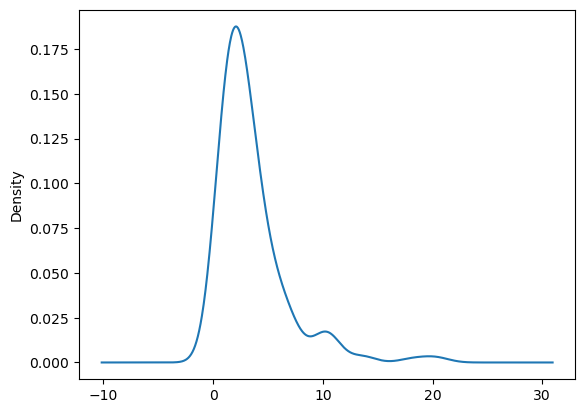

In [25]:
pd.Series(merged.groupby('isbn')['DK_ratings_count'].max() / merged.groupby('isbn')['GR_ratings_count'].max()).plot.density()

In [26]:
pd.Series(merged.groupby('isbn')['DK_ratings_count'].max() / merged.groupby('isbn')['GR_ratings_count'].max()).nlargest()

isbn
9788072444892    20.666667
9788024949949    19.545455
9788027715008    18.000000
9788027908172    13.888889
9788024950143    13.352941
dtype: float64

In [27]:
pd.Series(merged.groupby('isbn')['DK_ratings_count'].max() / merged.groupby('isbn')['GR_ratings_count'].max()).nsmallest()

isbn
9788088433262    0.113821
9788011037154    0.206897
9788027720613    0.319444
9788090819269    0.333333
9788090871250    0.350000
dtype: float64

C:\tools\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


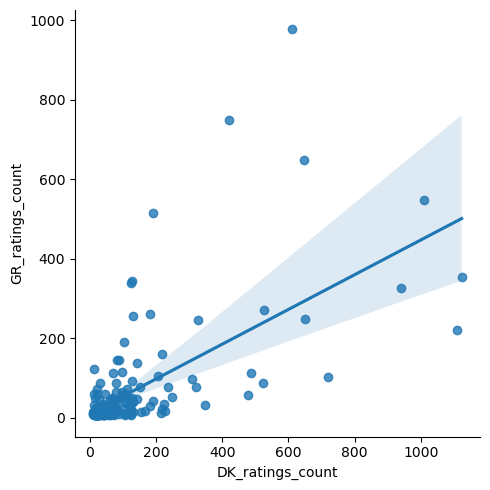

In [28]:
sns.lmplot(x='DK_ratings_count', y='GR_ratings_count', data=merged)

C:\tools\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


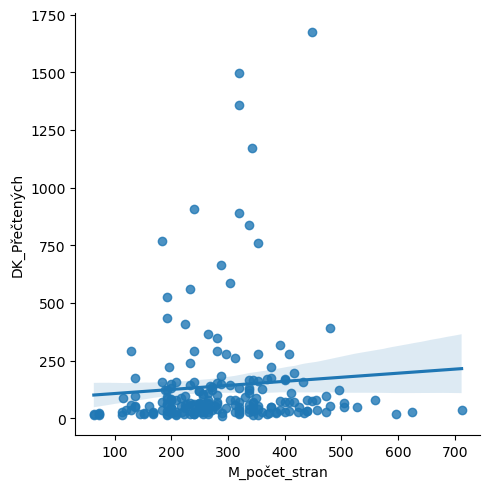

In [29]:
sns.lmplot(x='M_počet_stran', y='DK_Přečtených', data=merged)

C:\tools\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


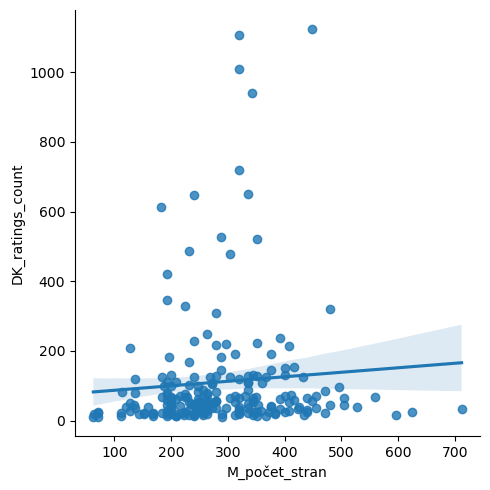

In [30]:
sns.lmplot(x='M_počet_stran', y='DK_ratings_count', data=merged)

C:\tools\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


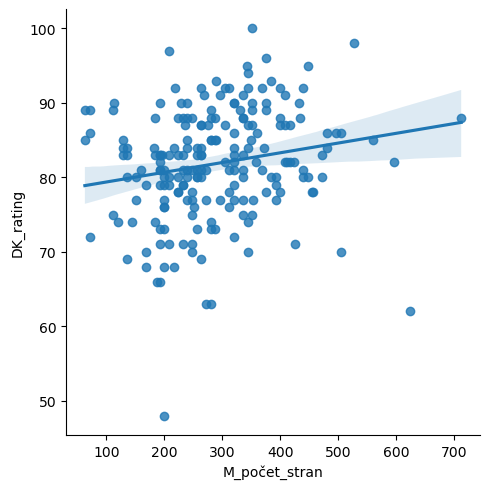

In [31]:
sns.lmplot(x='M_počet_stran', y='DK_rating', data=merged)

C:\tools\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


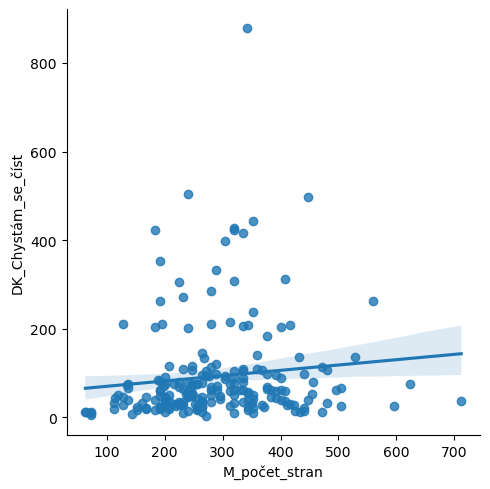

In [32]:
sns.lmplot(x='M_počet_stran', y='DK_Chystám_se_číst', data=merged)